In [1]:
import numpy as np
import pandas as pd
import scipy.optimize

from pytres import nnls, vi
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## NNLS

In [2]:
base_dir = 'example_data//KD74-TCE/'

data_full = pd.read_csv(f'{base_dir}/TRES.txt', sep='\t', header=None)
time_full = data_full[0].values
data_full = data_full.drop(columns=[0]).values
irf = pd.read_csv(f'{base_dir}/IRF.txt', sep='\t', names=['time', 'val'])['val'].values

In [3]:
solver_nnls = nnls.TresSolverNNLS(data_full, time_full, irf, n_components=3, wavelength_slice=slice(10, None), time_slice=slice(1050, 6200))

In [4]:
tres_annot_nnls = solver_nnls.solve()

Findind IRF shift...
Elapsed time: 10.12s
	IRF_shift: -0.02124

Solving TRES...
Elapsed time: 12.33s
	message: Optimization terminated successfully.
	nit: 56
	fun: 353965.37767791434
	x: [5.60773924 2.52073948 0.65496171]


(0.9970883796233633, 0.004747133318883388, True)
(6250, 79)
(8.4, 49.6)


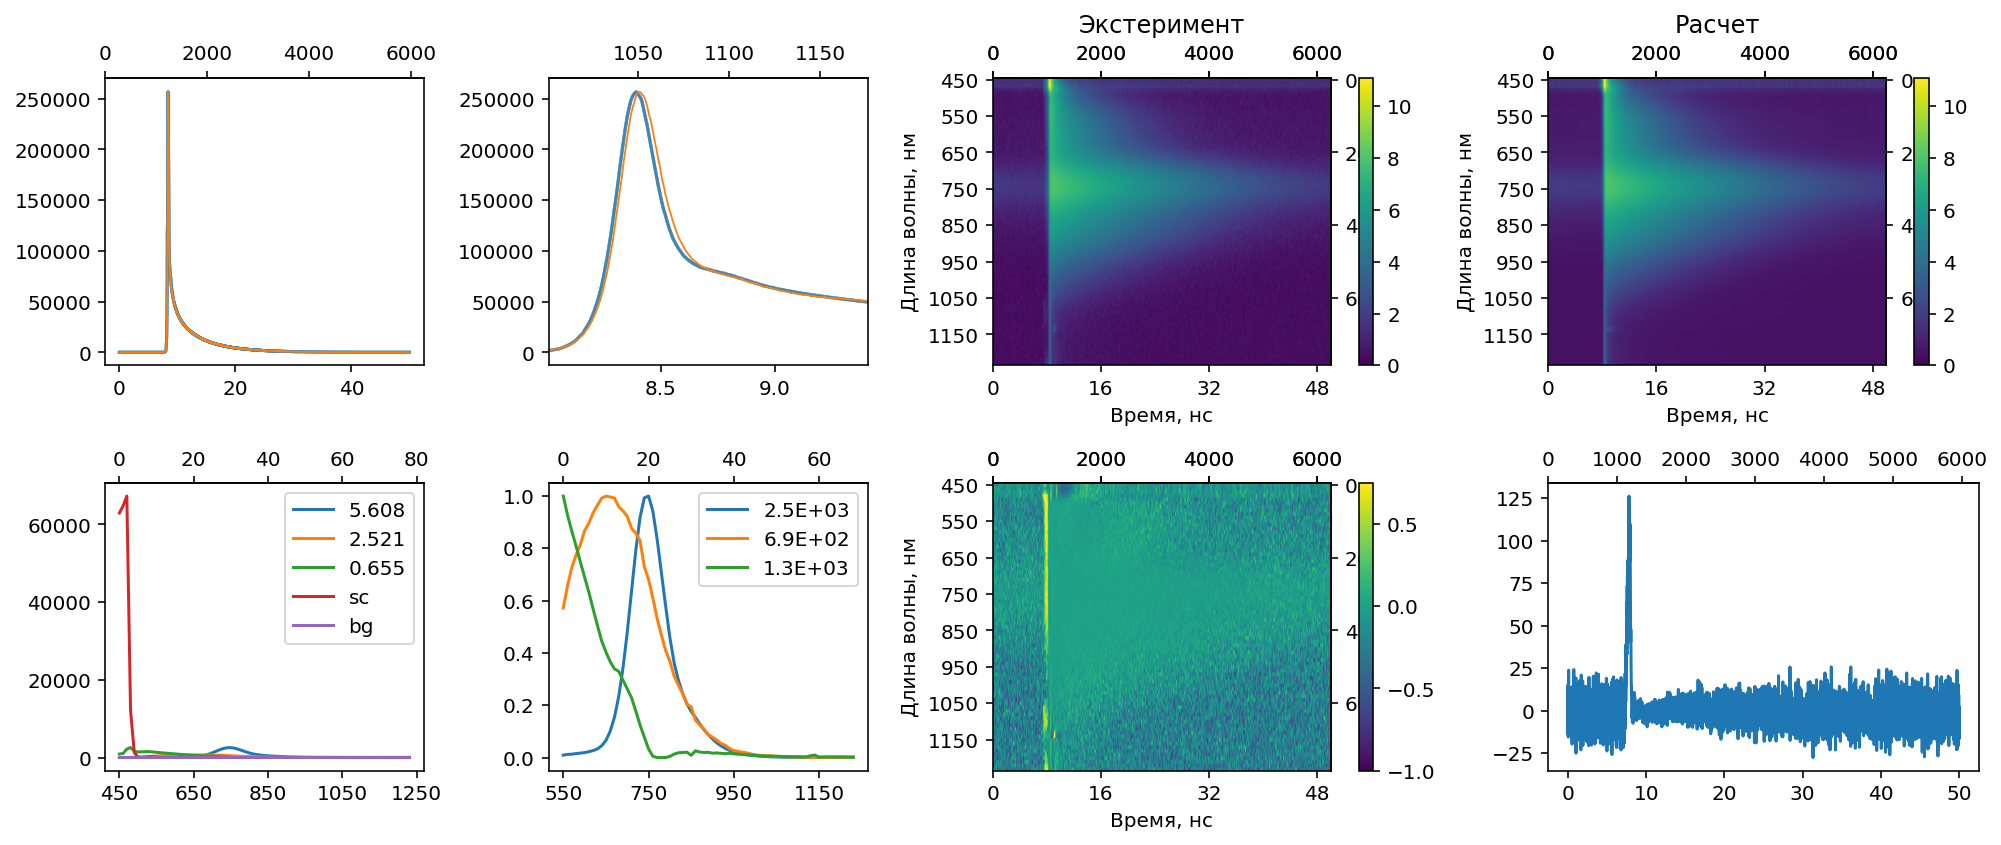

In [5]:
tres_annot_nnls.plot_summary()

## Use NNLS as initial point for VI 

In [6]:
initial_trace = vi.create_init_trace(tres_annot_nnls)

In [7]:
solver = vi.TresSolverVI(data_full, time_full, irf, n_components=3, wavelength_slice=slice(10, None), time_slice=slice(1050, 6200), initial_trace=initial_trace)

In [8]:
tres_annot = solver.solve()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/3500 [00:00<?, ?it/s]

(1.005906030182782, 0.004747133318883388, False)
(6250, 79)
(8.4, 49.6)


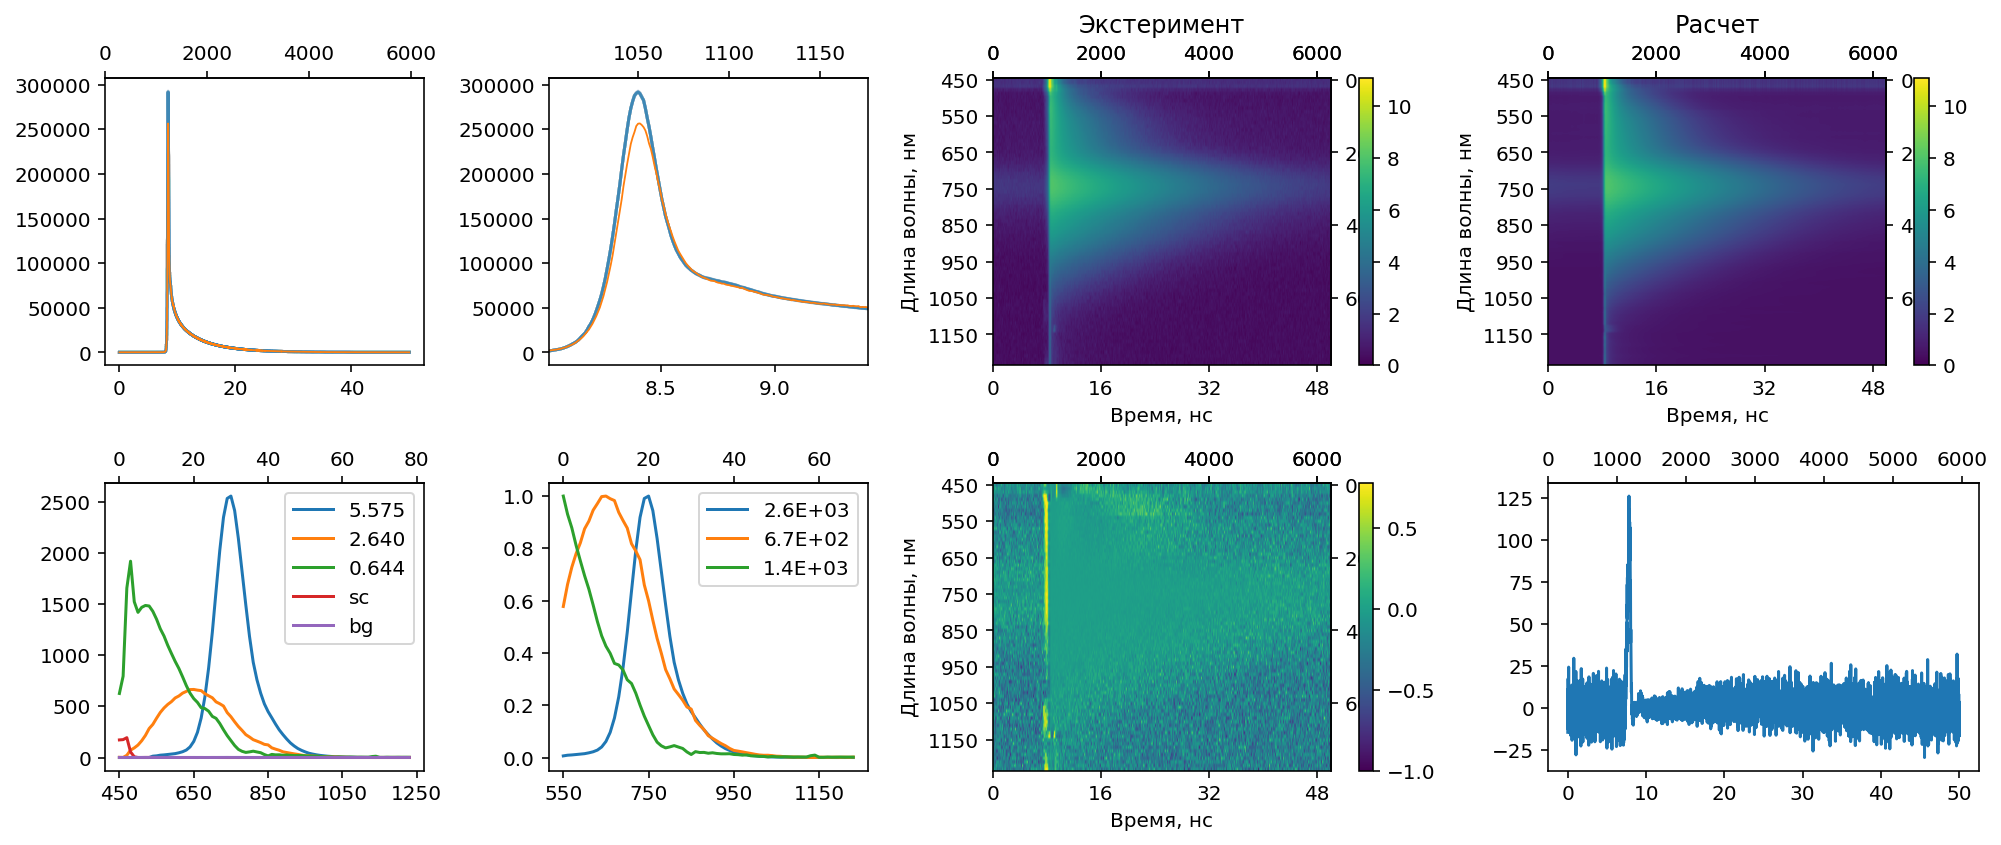

In [9]:
tres_annot.plot_summary()